In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pickle


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./datasets/wisatawan_bali.csv')

df.head()

,pintu,bulan,jumlah
0,Bandara Ngurah Rai,Januari,173867
1,Bandara Ngurah Rai,Februari,146115
2,Bandara Ngurah Rai,Maret,167954
3,Bandara Ngurah Rai,April,188189
4,Bandara Ngurah Rai,Mei,190638


## Prepocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pintu   264 non-null    object
 1   bulan   264 non-null    object
 2   jumlah  264 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 6.3+ KB


In [4]:
df.isna().sum()

pintu     0
bulan     0
jumlah    0
dtype: int64

In [5]:
df.describe()

,jumlah
count,264.000000
mean,169529.299242
std,187778.560920
min,13.000000
25%,2744.250000
50%,81598.500000
75%,295300.250000
max,624337.000000


### Encoding object value

In [6]:
label_encoder = LabelEncoder()

df['bulan'] = label_encoder.fit_transform(df['bulan'])
df['pintu'] = label_encoder.fit_transform(df['pintu'])

df.to_csv('./datasets/wisatawan_bali_encoded.csv')

In [7]:
df.head()

,pintu,bulan,jumlah
0,0,4,173867
1,0,3,146115
2,0,7,167954
3,0,1,188189
4,0,8,190638


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   pintu   264 non-null    int64
 1   bulan   264 non-null    int64
 2   jumlah  264 non-null    int64
dtypes: int64(3)
memory usage: 6.3 KB


In [9]:
df.describe()

,pintu,bulan,jumlah
count,264.00000,264.000000,264.000000
mean,0.50000,5.500000,169529.299242
std,0.50095,3.458609,187778.560920
min,0.00000,0.000000,13.000000
25%,0.00000,2.750000,2744.250000
50%,0.50000,5.500000,81598.500000
75%,1.00000,8.250000,295300.250000
max,1.00000,11.000000,624337.000000


### Outlier

In [10]:
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

Nilai IQR:  1.0


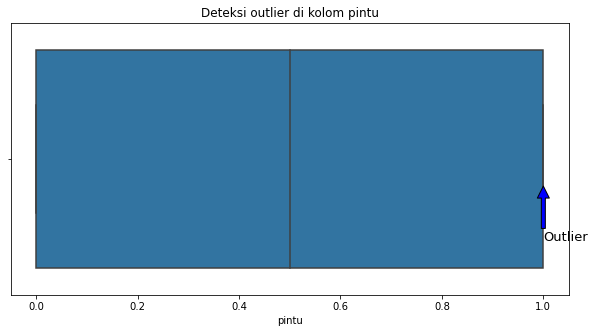

In [11]:
plt.figure(figsize = (10, 5))
plt.title("Deteksi outlier di kolom pintu")
sns.boxplot(df['pintu'])
plt.annotate('Outlier', (df['pintu'].describe()['max'], 0.1), 
             xytext=(df['pintu'].describe()['max'], 0.3),
             arrowprops=dict(facecolor='blue'), fontsize=13)

IQR = df['pintu'].describe()['75%'] - df['pintu'].describe()['25%']
print('Nilai IQR: ', IQR)

In [12]:
detect_outliers(df, 'pintu')

,pintu,bulan,jumlah


Nilai IQR:  8.25


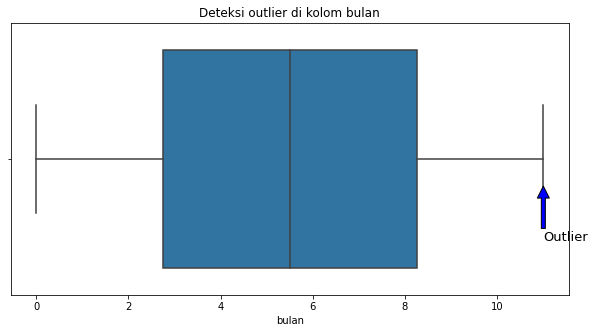

In [13]:
plt.figure(figsize = (10, 5))
plt.title("Deteksi outlier di kolom bulan")
sns.boxplot(df['bulan'])
plt.annotate('Outlier', (df['bulan'].describe()['max'], 0.1), 
             xytext=(df['bulan'].describe()['max'], 0.3),
             arrowprops=dict(facecolor='blue'), fontsize=13)

IQR = df['bulan'].describe()['75%'] - df['pintu'].describe()['25%']
print('Nilai IQR: ', IQR)

In [14]:
detect_outliers(df, 'bulan')

,pintu,bulan,jumlah


Nilai IQR:  292556.0


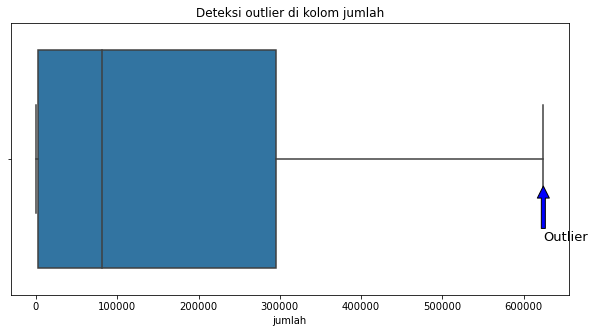

In [15]:
plt.figure(figsize = (10, 5))
plt.title("Deteksi outlier di kolom jumlah")
sns.boxplot(df['jumlah'])
plt.annotate('Outlier', (df['jumlah'].describe()['max'], 0.1), 
             xytext=(df['jumlah'].describe()['max'], 0.3),
             arrowprops=dict(facecolor='blue'), fontsize=13)

IQR = df['jumlah'].describe()['75%'] - df['jumlah'].describe()['25%']
print('Nilai IQR: ', IQR)

In [16]:
detect_outliers(df, 'jumlah')

,pintu,bulan,jumlah


## Constructing Model

In [17]:
X = df.drop('jumlah', axis=1).values
y = df[['jumlah']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
regression = LinearRegression()

regression.fit(X_train, y_train)

print('Coefficients: ', regression.coef_)
print('Intercept: ', regression.intercept_)

Coefficients:  [[-324458.01491104    2021.91930495]]
Intercept:  [316674.17051825]


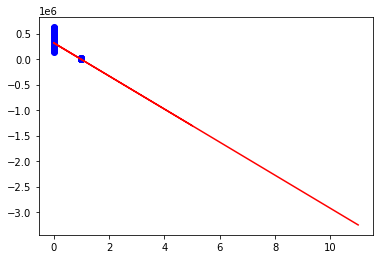

In [19]:
plt.scatter(X[:, 0], y, color='blue')
plt.plot(X_train, regression.coef_[0][0] * X_train + regression.intercept_[0], 'r')

In [20]:
y_pred = regression.predict(X_test)

print('MEAN absolute error: %.2f' %np.mean(np.absolute(y_pred - y_test)))
print('Residual sum of square (MSE) : %.2f' %np.mean((y_pred - y_test)**2))
print('R2 score : %.2f' %r2_score(y_pred, y_test))
print('Regression score : %.2f' %regression.score(X_test, y_test))

MEAN absolute error: 55801.20
Residual sum of square (MSE) : 8449040456.39
R2 score : 0.68
Regression score : 0.78


In [21]:
file_name = './models/model.regr'
pickle.dump(regression, open(file_name, 'wb'))

In [22]:
model = pickle.load(open(file_name, 'rb'))

## Tes Model

In [23]:
from ipywidgets import widgets
from IPython.display import display

In [24]:
submit_button = widgets.Button(description='Submit')
select_bulan = widgets.Dropdown(
    options=[('Januari', 4), 
             ('Februari', 3), 
             ('Maret', 7),
            ('April', 1), 
             ('Mei', 8), 
             ('Juni', 6),
            ('Juli', 5), 
             ('Agustus', 0), 
             ('Spetember', 11),
            ('Oktober', 10), 
             ('Nopember', 9), 
             ('Desember', 2)],
    value=4,
    description='Bulan:',)

select_pintu = widgets.Dropdown(
    options=[('Ngurah Rai', 0), 
             ('Benoa', 1)],
    value=0,
    description='Pintu:',)

def pred(b):
    pintu = int(select_pintu.value)
    bulan = int(select_bulan.value)
    res = model.predict([[pintu, bulan]])
    print('Prediksi wisatawan: %.0f orang' %res)

        
display(select_pintu)
display(select_bulan)
print()
display(submit_button)

submit_button.on_click(pred)

Dropdown(description='Pintu:', options=(('Ngurah Rai', 0), ('Benoa', 1)), value=0)

Dropdown(description='Bulan:', options=(('Januari', 4), ('Februari', 3), ('Maret', 7), ('April', 1), ('Mei', 8…

Button(description='Submit', style=ButtonStyle())

Prediksi wisatawan: 324762 orang
